# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb

### Fecha de entrega:
<font color=red>Viernes 5 de Septiembre a las 13:00 hs</font> 

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Series de Tiempo de la Republica Argentina [link](https://datosgobar.github.io/series-tiempo-ar-api/applications/) , obtener dos series de indicadores del Ministerio de Agricultura, Ganadería y Pesca. En total, dicho Ministerio tiene 72 series anuales y pueden buscar dos serie de indicadores de su interés.

In [10]:
# Importamos las librerias que vamos a utiliizar para este punto

import pandas as pd
import matplotlib.pyplot as plt
import os
import requests
import urllib.parse
import matplotlib.dates as mdates

#Funcion para llamar a la api de Series de Tiempo de la Republica Argentina
def get_api_call(ids, **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/series/api/"
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))

#Creamos los dataframes con las series de superficie sembrada de soja y trigo
df_trigo = pd.read_csv(get_api_call(["34.1_THTRI_0_P_15"], format= "csv", collapse = "year"))
df_soja = pd.read_csv(get_api_call(["34.1_SHSOJ_0_P_14"], format= "csv", collapse = "year"))

# Hacemos print a las series
print(df_soja)
print(df_trigo)

   indice_tiempo  soja_hectareas
0     1979-01-01      2100000.00
1     1980-01-01      1925000.00
2     1981-01-01      2040000.00
3     1982-01-01      2362000.00
4     1983-01-01      2920000.00
5     1984-01-01      3300000.00
6     1985-01-01      3340000.00
7     1986-01-01      3700000.00
8     1987-01-01      4413000.00
9     1988-01-01      4670000.00
10    1989-01-01      5100000.00
11    1990-01-01      4966600.00
12    1991-01-01      5004000.00
13    1992-01-01      5319660.00
14    1993-01-01      5817490.00
15    1994-01-01      6011240.00
16    1995-01-01      6002155.00
17    1996-01-01      6669500.00
18    1997-01-01      7176250.00
19    1998-01-01      8400000.00
20    1999-01-01      8790500.00
21    2000-01-01     10665000.00
22    2001-01-01     11639000.00
23    2002-01-01     12607000.00
24    2003-01-01     14525000.00
25    2004-01-01     14400000.00
26    2005-01-01     15329000.00
27    2006-01-01     16141000.00
28    2007-01-01     16600000.00
29    2008

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva ambas series de indicadores del Ministerio de Ganaderia y  presente en una tabla en su reporte. Dicha tabla debe mostrar: numero de observaciones, media, desvío standard, min, p25, mediana, p75 y max. Comente la tabla en **el reporte**.

In [11]:
#Juntamos las dos bases de datos en una sola. Ambas son del mismo periodo y con la misma frecuencia
df = df_soja.merge(df_trigo)
df = df.rename( columns = {"indice_tiempo":"fecha"})

#Armamos la tabla de estadisticas descriptivas
pd.set_option('display.float_format', '{:.2f}'.format)
analisis_descriptivo = df.describe()
print(df)
print(analisis_descriptivo)

         fecha  soja_hectareas  trigo_hectareas
0   1979-01-01      2100000.00       5000000.00
1   1980-01-01      1925000.00       6196000.00
2   1981-01-01      2040000.00       6566000.00
3   1982-01-01      2362000.00       7410000.00
4   1983-01-01      2920000.00       7200000.00
5   1984-01-01      3300000.00       6000000.00
6   1985-01-01      3340000.00       5700000.00
7   1986-01-01      3700000.00       5000000.00
8   1987-01-01      4413000.00       4850000.00
9   1988-01-01      4670000.00       4750000.00
10  1989-01-01      5100000.00       5500000.00
11  1990-01-01      4966600.00       6178400.00
12  1991-01-01      5004000.00       4750850.00
13  1992-01-01      5319660.00       4547700.00
14  1993-01-01      5817490.00       4910000.00
15  1994-01-01      6011240.00       5308000.00
16  1995-01-01      6002155.00       5087800.00
17  1996-01-01      6669500.00       7366850.00
18  1997-01-01      7176250.00       5918665.00
19  1998-01-01      8400000.00       545

In [12]:
# Exportar el DataFrame de análisis descriptivo a Excel
analisis_descriptivo.to_excel("analisis_descriptivo.xlsx")
print (analisis_descriptivo.to_excel)

<bound method NDFrame.to_excel of        soja_hectareas  trigo_hectareas
count           46.00            46.00
mean      11278732.72       5658640.98
std        6456155.25       1001537.80
min        1925000.00       3160000.00
25%        5028000.00       4932500.00
50%       12123000.00       5911985.00
75%       16975000.00       6300000.00
max       20479000.00       7410000.00>


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva ambas series de indicadores del Ministerio de Ganaderia y  presente en una tabla en su reporte. Dicha tabla debe mostrar: numero de observaciones, media, desvío standard, min, p25, mediana, p75 y max. Comente la tabla en **el reporte**.

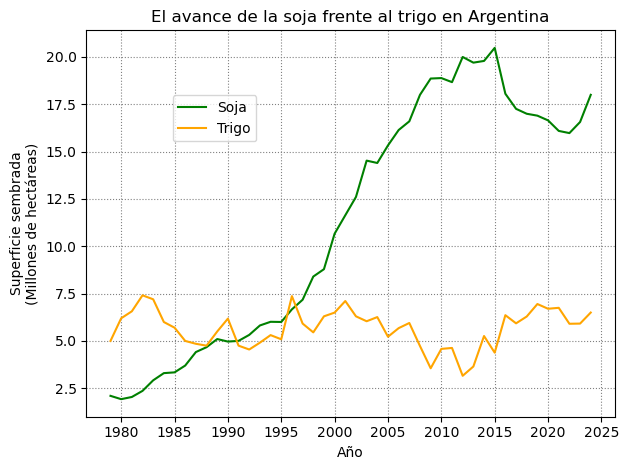

In [13]:
# Definimos los vectores de los graficos y escalamos para una mayor comrprension.
x1 = pd.to_datetime(df["fecha"])
y1 = df["soja_hectareas"]/1000000
y2 = df["trigo_hectareas"]/1000000

# Armamos el gráfico
plt.plot(x1, y1, label="Soja",color ="green") # serie 1
plt.plot(x1, y2, label="Trigo", color = "orange")# serie 2

# Formato de números sin notación científica
plt.ticklabel_format(style='plain', axis='y')

# Etiquetas y título
plt.title("El avance de la soja frente al trigo en Argentina")
plt.legend(loc = "upper left",bbox_to_anchor=(0.15, 0.85))
plt.xlabel("Año")
plt.grid(True, linestyle=':', color='gray')
plt.ylabel("Superficie sembrada\n(Millones de hectáreas)")
plt.tight_layout()

# Guardamos el grafico
# Corregimos el path usando os.path.normpath para manejar correctamente los separadores
#carpeta = r"C:\Users\lautaro\Desktop\Big Data\TP1"  # Usamos raw string (r) para evitar problemas con backslashes
#carpeta = os.path.normpath(carpeta)  # Normaliza el path según el sistema operativo
# Aseguramos que la carpeta exista
#if not os.path.exists(carpeta):
#    os.makedirs(carpeta)  # Crea la carpeta si no existe
    
#plt.savefig(os.path.join(carpeta, 'figura_simple2.png'), bbox_inches='tight', dpi=300)

# Mostramos el gráfico
plt.show()

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos de tendencia distintos usando la librería Matplotlib (repasen Clase 3). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*.
Recuerde los principios de visualización de datos y comente dichas figuras en su reporte.

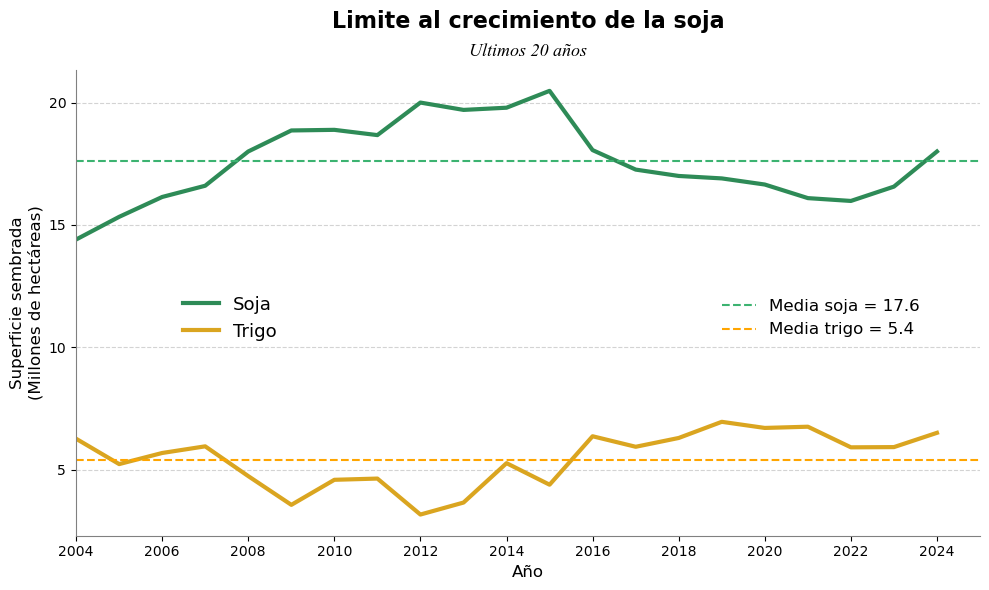

In [14]:
# Creamos la figura con mejor proporción
fig, ax = plt.subplots(figsize=(10, 6))

# Definimos las series
ax.plot(x1[25:], y1[25:], label="Soja", color="#2E8B57", linewidth=3)
ax.plot(x1[25:], y2[25:], label="Trigo", color="#DAA520", linewidth=3)

# Formato de números sin notación científica
ax.ticklabel_format(style="plain", axis="y")

# agrego las medias 
mean_y1 = round(y1[25:].mean(),1)
mean_y2 = round(y2[25:].mean(),1)

mean_linea1=plt.axhline(y=mean_y1, color='mediumseagreen', linestyle='--', label=f"Media soja = {mean_y1}")
mean_linea2=plt.axhline(y=mean_y2, color='orange', linestyle='--', label=f"Media trigo = {mean_y2}")

medias = [mean_linea1, mean_linea2]

# Título y ssubtitulo
ax.set_title("Limite al crecimiento de la soja",  fontsize=16, fontweight='bold', pad=30)
plt.text(0.5, 1.02, "Ultimos 20 años", transform=plt.gca().transAxes, ha="center", va="bottom",fontsize=13, fontstyle="italic", fontname="Times New Roman")

# Labels
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Superficie sembrada\n(Millones de hectáreas)", fontsize=12)

# modificamos el grafico
ax.grid(True, axis="y", linestyle="--", alpha=1, color="lightgray")
ax.locator_params(axis="y", nbins=6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("gray")
ax.spines["bottom"].set_color("gray")

#graficamos las dos leyendas
series_handles = ax.get_lines()[:2]
legend1 = ax.legend(handles=series_handles,loc="upper left", frameon=False, fontsize=13, bbox_to_anchor=(0.1, 0.55))
ax.add_artist(legend1)
ax.legend(handles=medias, loc='upper right',frameon=False,fontsize=12,bbox_to_anchor=(0.95, 0.54))
ax.set_xlim(x1[25:].min())

plt.tight_layout()

#guardamos el grafico
plt.savefig(os.path.join(carpeta, 'figura_objetos.png'), bbox_inches='tight', dpi=300)

# mostramos el grafico
plt.show()

### Parte B

#### Ejercicio 4 - Documentando noticias locales y en el extranjero
Eligan dos sitios web de noticias: uno de Argentina y uno del extranjero (puede ser en castellano o en inglés como el *New York Times*).

Utilicen herramientas de webscraping para obtener los **links** de las noticias de la portada en ambos diarios. Guarden cada titular con los links obtenidos en un dataframe. Por lo tanto, debe quedarles un dataframe de 4 columnas: una columna para noticias locales, otra para su link, otra columna de noticias extranjeras y una ultima columna de sus links. Luego, expórtenlo a un archivo de excel.

En el reporte este esta parte B:
1) Inserten una captura de pantalla de la pagina del diario extranjero y en Argentina de las cuales hacen el ejercicio de extraer titulares y sus links correspondientes. Esto servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.
2) Comenten brevemente (1 párrafo) las diferencias/similitudes al extraer titulares en diarios de Argentina versus diario extranjero
3) Comenten brevemente (1 párrafo) las dificultades y cómo resolvieron dichas dificultades.

*Nota*: es posible que logren obtener los links a las noticias sin el dominio: por ejemplo "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

In [16]:
from IPython.display import display, HTML, Image
import requests
from io import BytesIO


In [17]:
# URL de las imagenes
url1 = "https://raw.githubusercontent.com/RafaelPCh/BigDataUBA-Grupo3/main/TP1-Grupo3/LPO_1.jpg"
url2 = "https://raw.githubusercontent.com/RafaelPCh/BigDataUBA-Grupo3/main/TP1-Grupo3/el_pais1.jpg"


display(Image(url=url1, width=500))

display(Image(url=url2, width=500))

In [18]:
html_texto = """
<p> Los diarios a los que accedí se parecen bastante en su diseño. Y los busqué de esa manera porque 
tanto en el país como en el extranjero se protegen y bloquean su contenido para este tipo de actividades. 
</p>
"""
display(HTML(html_texto))

In [19]:
html_texto = """

<p> Como se describe en el punto 2, algunos diarios bloqueban el contenido, piden membresia o el contenido dinamico 
hacian dificil el acceso pero busque diarios que no sean tan cargados en su contenido.
Respecto a la dificultad del lenguaje, comencé replicando los codigos de la teoria y 
buscando en internet formas alternativas que me ayuden 
</p>
"""
display(HTML(html_texto))

In [20]:
!pip install requests 
!pip install BeautifulSoup4 
!pip install pandas

import requests # html 
from bs4 import BeautifulSoup #html parser
import pandas as pd #dataframe 
import os   # sistema operativo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [pandas]2m5/6 [pandas]


In [21]:
# URL del diario del Extranjero. El Pais de España
url ='https://elpais.com/?ed=es'

# Obtengo el contenido HTML
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Inicializo las listas
titulos = []
enlaces = []

# Busco todos los elementos <h2>
for idx, h2 in enumerate(soup.find_all('h2')):
    titulo = h2.get_text(strip=True)
    
    # Busco el link dentro del <h2>
    a_tag = h2.find('a')
    link = a_tag['href'] if a_tag and a_tag.has_attr('href') else None
    
    # Meto a las listas con ID
    titulos.append({'id': idx, 'Titulo_ElPAIS': titulo})
    enlaces.append({'id': idx, 'Link_ElPAIS': link})

# Voy a hacer los DataFrames separados
df_titulos = pd.DataFrame(titulos)
df_enlaces = pd.DataFrame(enlaces)

# Uno los DataFrames por id
df_final_Ext = pd.merge(df_titulos, df_enlaces, on='id')



# Imprimo el resultado
print(df_final_Ext)

      id                                      Titulo_ElPAIS  \
0      0  Trump pone fin a cuatro años ininterrumpidos d...   
1      1  Los cadáveres del ICE: 14 migrantes han muerto...   
2      2  El misterio de una lancha pulverizada por un m...   
3      3  Maduro llama a la movilización ante la agresió...   
4      4  Dos aviones de combate venezolanos sobrevuelan...   
..   ...                                                ...   
137  137  Manu Carreño: “La gente se ha atrevido a hacer...   
138  138  Eduard Fernández tiene un mensaje breve y clar...   
139  139                        Ancelotti desata la ilusión   
140  140  El sacrificio invisible: miedo, consumo y pert...   
141  141  Ya es oficial: Sophie Turner (‘Juego de tronos...   

                                           Link_ElPAIS  
0    https://elpais.com/economia/2025-09-05/trump-p...  
1    https://elpais.com/us/migracion/2025-09-05/los...  
2    https://elpais.com/america/2025-09-05/el-miste...  
3    https://el

In [22]:
# URL del diario de Argentina
url_arg ='https://www.lapoliticaonline.com/'

# Obtengo el contenido HTML
response = requests.get(url_arg)
soup = BeautifulSoup(response.content, 'html.parser')

# Inicializo listas
titulosArg = []
enlacesArg = []

# Buscar todos los elementos <h2>
for idx, h2_A in enumerate(soup.find_all('h2')):
    tituloA = h2_A.get_text(strip=True)
    
    # Buscar enlace dentro del <h2>
    a_tagA = h2_A.find('a')
    link_A0 = a_tagA['href'] if a_tagA and a_tagA.has_attr('href') else None

    #Concateno la pagina central con el nombre de cada nota en particular para tener el link completo 
    # URL del diario de Argentina
    url_arg1 ='https://www.lapoliticaonline.com' # redefino esta variable, sin "/" del final, sino se exporta doble al concatenar
    link_A = url_arg1+link_A0
    
    # Agregar a las listas con ID
    titulosArg.append({'id': idx, 'Titulo_LPO': tituloA})
    enlacesArg.append({'id': idx, 'Link_LPO': link_A})

# Hago los DataFrames por separado
df_titulosArg = pd.DataFrame(titulosArg)
df_enlacesArg = pd.DataFrame(enlacesArg)

# Unifico los DataFrames por 'id'
df_final_Arg = pd.merge(df_titulosArg, df_enlacesArg, on='id')

# Muestro el resultado
print(df_final_Arg)

      id                                         Titulo_LPO  \
0      0  Bausili se resiste a entregar información a la...   
1      1  El hijo de Juez destrozó al Gordo Dan: "qué po...   
2      2  Francos retó al Gordo Dan por atacar a Luis Ju...   
3      3  El gobierno se quedó sin combustible y frena l...   
4      4  El pacto de Stefano di Carlo con Milei que hab...   
..   ...                                                ...   
106  106  Las coimas de Karina hunden a Milei: el 60 por...   
107  107  Arietto tuvo que huir de Vassalli después de h...   
108  108  Milei se derrumba en Córdoba y Schiaretti podr...   
109  109  Petri mete mano en los fondos de las Fuerzas A...   
110  110  "Petri es el peor ministro de Defensa de la de...   

                                              Link_LPO  
0    https://www.lapoliticaonline.com/economia/toto...  
1    https://www.lapoliticaonline.com/politica/el-h...  
2    https://www.lapoliticaonline.com/politica/fran...  
3    https://ww

In [23]:
# Ahora unifico los datos de los 2 diarios en un solo excel

# Unir los DataFrames por 'id'

df_final_T = pd.merge(df_final_Ext, df_final_Arg, on='id')

print(df_final_T)

      id                                      Titulo_ElPAIS  \
0      0  Trump pone fin a cuatro años ininterrumpidos d...   
1      1  Los cadáveres del ICE: 14 migrantes han muerto...   
2      2  El misterio de una lancha pulverizada por un m...   
3      3  Maduro llama a la movilización ante la agresió...   
4      4  Dos aviones de combate venezolanos sobrevuelan...   
..   ...                                                ...   
106  106  Año cuántico: de las aplicaciones incipientes ...   
107  107  “En mi círculo casi todos hemos usado la IA co...   
108  108  ChatGPT está caído y no responde a las pregunt...   
109  109  Salvador Illa defiende la quita de deuda por s...   
110  110  Montero calienta la precañamapa andaluza y acu...   

                                           Link_ElPAIS  \
0    https://elpais.com/economia/2025-09-05/trump-p...   
1    https://elpais.com/us/migracion/2025-09-05/los...   
2    https://elpais.com/america/2025-09-05/el-miste...   
3    https:

In [36]:
import os

# Carpeta de destino en tu escritorio
carpeta_destino = r"C:\Users\lautaro\Desktop\BigData\Tp1"

# Nombre del archivo Excel
archivo_nombre = "titulos_y_links.xlsx"

# Construyo la ruta completa
destino = os.path.join(carpeta_destino, archivo_nombre)

# Si la carpeta no existe, la creo
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino, exist_ok=True)
    print("📂 Carpeta creada:", carpeta_destino)

# Guardo el archivo
df_final_T.to_excel(destino, index=False)
print("✅ Archivo guardado en:", destino)



📂 Carpeta creada: C:\Users\lautaro\Desktop\BigData\Tp1
✅ Archivo guardado en: C:\Users\lautaro\Desktop\BigData\Tp1/titulos_y_links.xlsx
